In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [2]:
# ログを読み込む
logfile = "./blog/101-2017-02.csv"
df = pd.read_csv(
    logfile,
    header=None,
    usecols=[0, 2, 3, 7],
    names=["timestamp", "from", "browser", "to"],
    parse_dates=["timestamp"])

df["browser"] = df["browser"].fillna(value="Unknown")

df.head()

,timestamp,from,browser,to
0,2017-02-01 00:00:49,http://www.madopro.net/,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,http://www.madopro.net/entry/MachineLearningFo...
1,2017-02-01 00:01:21,https://search.yahoo.co.jp/,Mozilla/5.0 (iPhone; CPU iPhone OS 10_0_3 like...,http://www.madopro.net/entry/char_level_lm_wit...
2,2017-02-01 00:06:58,https://www.google.co.jp/,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,http://www.madopro.net/entry/2016/08/15/164928
3,2017-02-01 00:22:06,http://www.madopro.net/entry/2016/06/17/024832,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,http://www.madopro.net/entry/2016/10/06/014040
4,2017-02-01 00:37:52,NaN,Mozilla/5.0 (iPad; CPU OS 10_2 like Mac OS X) ...,http://www.madopro.net/entry/2016/07/13/200920


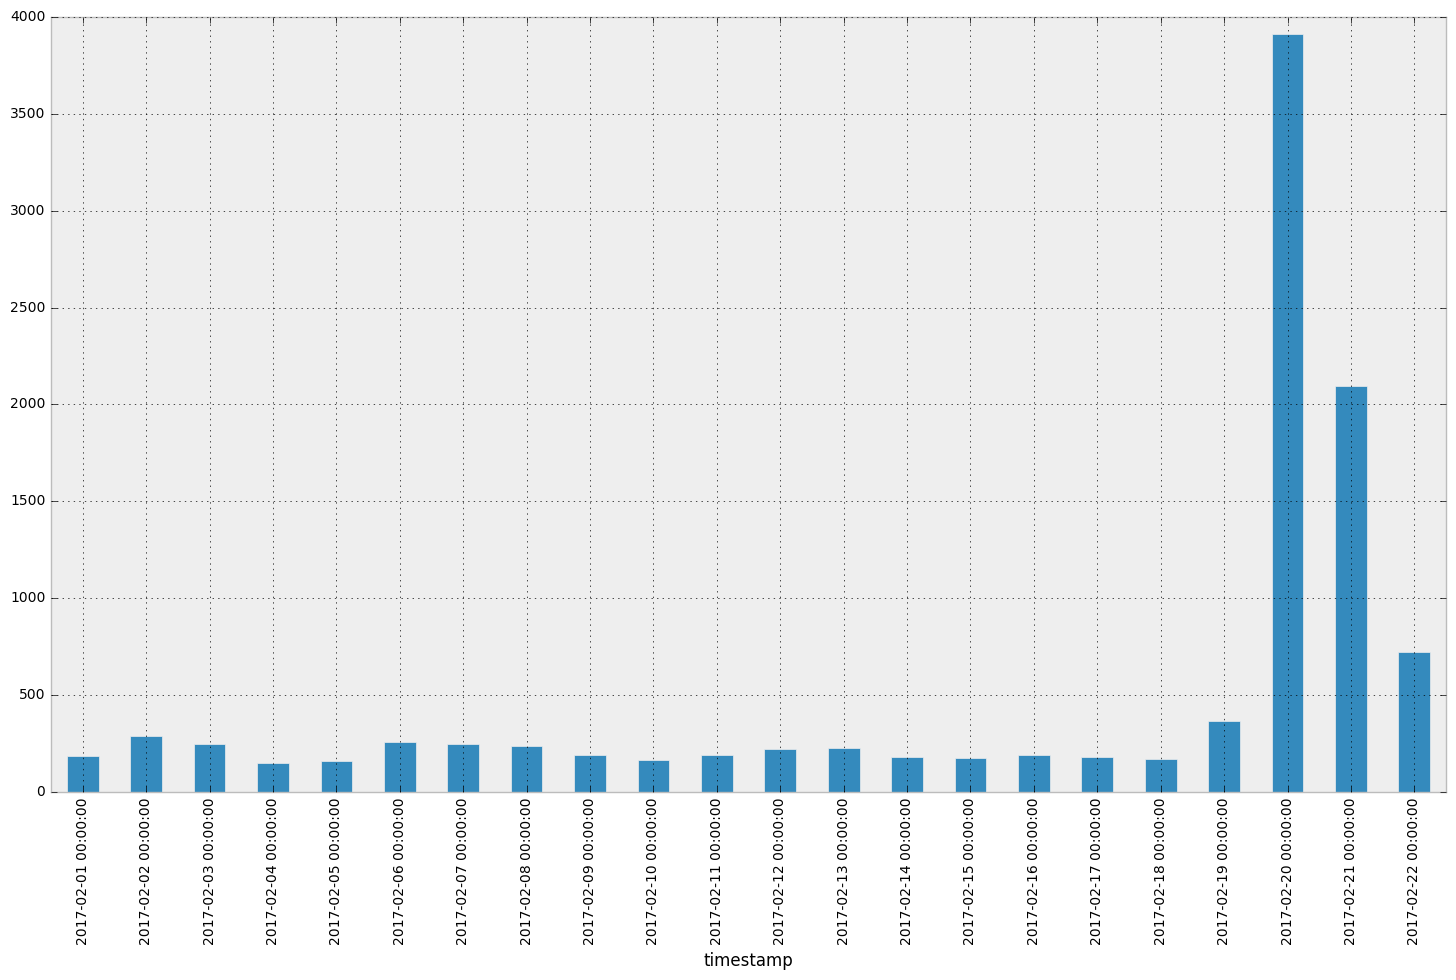

In [3]:
# 日ごとのアクセス数の推移
df.set_index("timestamp").groupby(pd.TimeGrouper(freq="D"))["browser"].count().plot.bar(figsize=(18, 10))
plt.show()

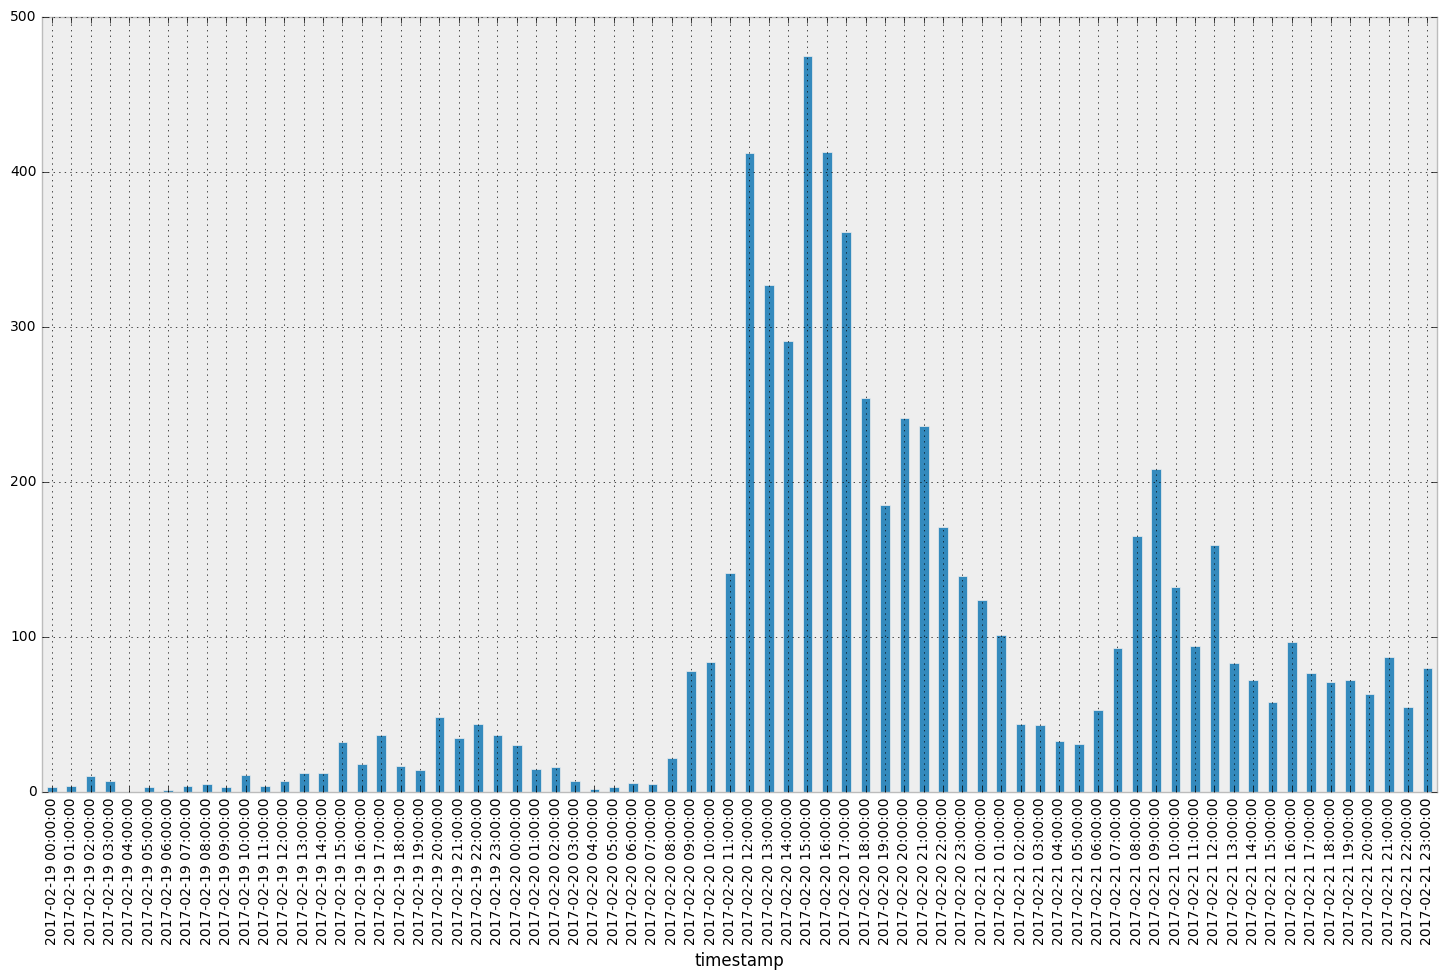

In [4]:
# 2/19～2/21の1時間ごとのアクセス数の推移
df.loc[(df["timestamp"] >= "2017-02-19") & (df["timestamp"] <= "2017-02-22")].set_index("timestamp").groupby(pd.TimeGrouper(freq="h"))["browser"].count().plot.bar(figsize=(18, 10))
plt.show()

In [5]:
# URL prefixes
google = "https://www.google.co.jp/"
hatebu = "http://b.hatena.ne.jp"
blog = "http://hatenablog.com/"
hotentry = "http://b.hatena.ne.jp/hotentry"
twitter = "https://t.co/"

In [6]:
# 2/19～2/21の3日間のアクセスについて、
# 各サイトからのアクセスかどうかを持つbool値のリストを用意
df = df.loc[(df["timestamp"] >= "2017-02-19") & (df["timestamp"] <= "2017-02-22")].set_index("timestamp")
google_list = df["from"].map(lambda x: str(x).startswith(google))
hatebu_list = df["from"].map(lambda x: str(x).startswith(hatebu) or str(x).startswith(blog))
hotentry_list = df["from"].map(lambda x: str(x).startswith(hotentry))
twitter_list = df["from"].map(lambda x: str(x).startswith(twitter))

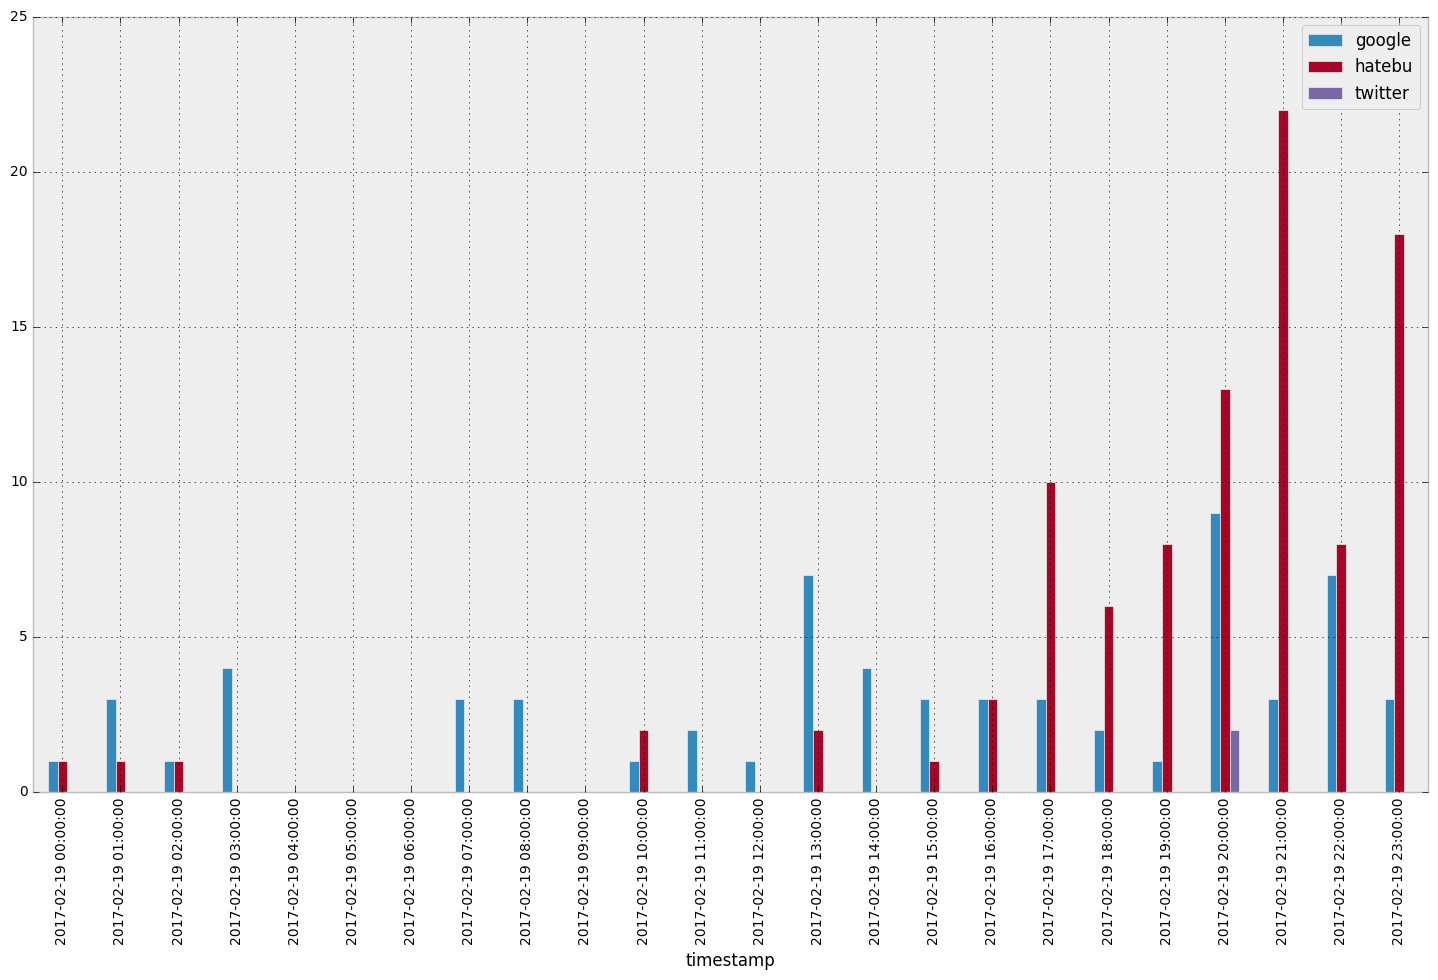

In [7]:
# 掲載前日のGoogle, はてブ、 Twitterからのアクセスを1時間ごとに集計してプロット
google_hourly = df[google_list].groupby(pd.TimeGrouper(freq="h"))["from"].count()
hourly = pd.DataFrame(index=google_hourly.index)
hourly["google"] = google_hourly
hourly["hatebu"] = df[hatebu_list].groupby(pd.TimeGrouper(freq="h"))["from"].count()
hourly["twitter"] = df[twitter_list].groupby(pd.TimeGrouper(freq="h"))["from"].count()
hourly[hourly.index < "2017-02-20"].plot.bar(figsize=(18, 10))
plt.show()

In [8]:
# はてブからMachineLearningForTradingへの最初のアクセスはいつ？
ML_for_trading = "http://www.madopro.net/entry/MachineLearningForTrading"
df[hatebu_list & (df["to"] == ML_for_trading)].head()

,from,browser,to
timestamp,,,
2017-02-19 16:12:11,http://b.hatena.ne.jp/?iosapp=1,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-19 17:10:24,http://hatenablog.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like M...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-19 17:18:53,http://hatenablog.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-19 17:21:40,http://hatenablog.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-19 17:30:25,http://b.hatena.ne.jp/hotentry/it/%E6%8A%80%E8...,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,http://www.madopro.net/entry/MachineLearningFo...


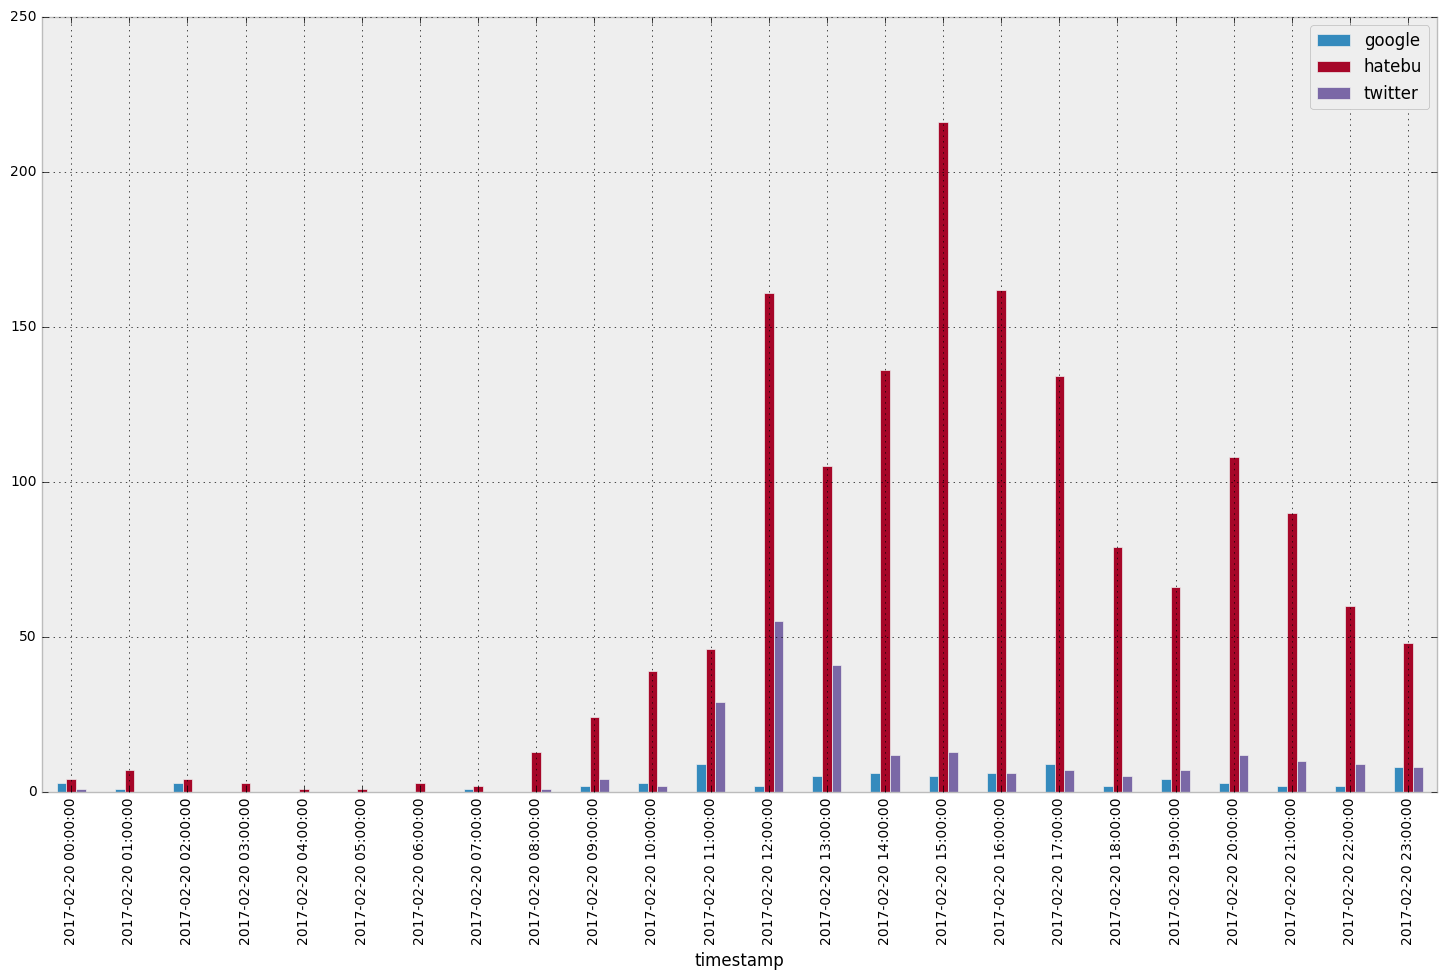

In [9]:
# 掲載当日のプロット
hourly[("2017-02-20" <= hourly.index) & (hourly.index < "2017-02-21")].plot.bar(figsize=(18, 10))
plt.show()

In [10]:
# ホットエントリーのページから当該記事への最初のアクセス
ML_for_trading = "http://www.madopro.net/entry/MachineLearningForTrading"
df[hotentry_list & (df["to"] == ML_for_trading)].head()

,from,browser,to
timestamp,,,
2017-02-19 17:30:25,http://b.hatena.ne.jp/hotentry/it/%E6%8A%80%E8...,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-20 08:32:49,http://b.hatena.ne.jp/hotentry/it?of=30,Mozilla/5.0 (Linux; Android 6.0.1; ASUS_Z00ED ...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-20 08:36:38,http://b.hatena.ne.jp/hotentry/it?limit=30&of=60,Mozilla/5.0 (Linux; Android 4.2.2; L-01F Build...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-20 08:48:54,http://b.hatena.ne.jp/hotentry/it,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,http://www.madopro.net/entry/MachineLearningFo...
2017-02-20 08:57:04,http://b.hatena.ne.jp/hotentry/it?of=9,Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...,http://www.madopro.net/entry/MachineLearningFo...


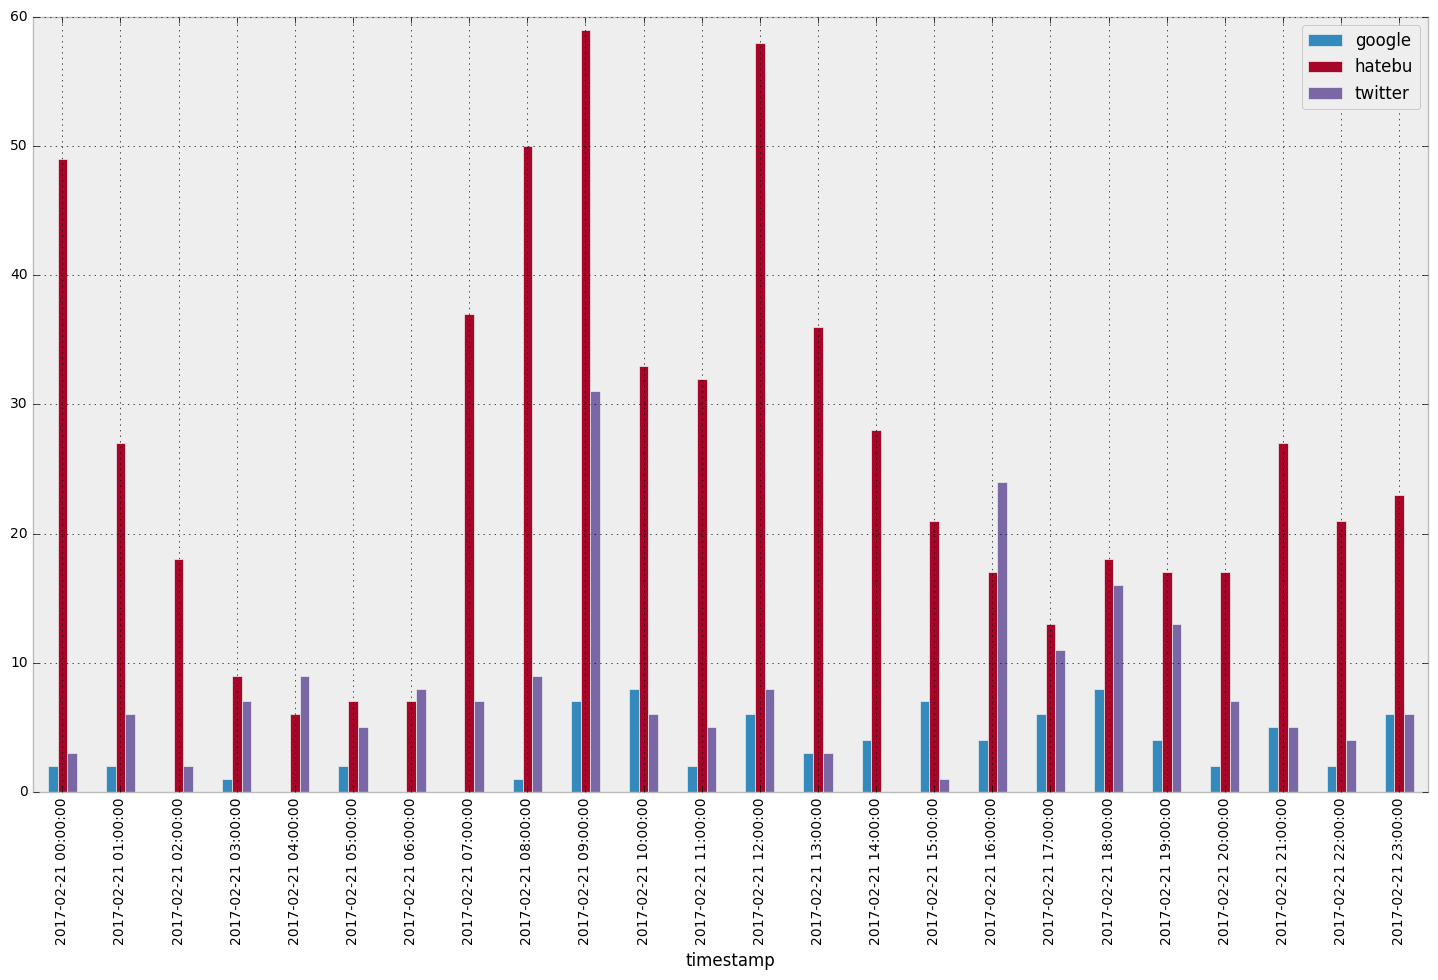

In [11]:
# 掲載翌日
hourly[("2017-02-21" <= hourly.index) & (hourly.index < "2017-02-22")].plot.bar(figsize=(18, 10))
plt.show()

In [12]:
# Twitterとはてブからの3日間の総アクセス数
print(len(df[twitter_list]))
print(len(df[hatebu_list]))

420
2238


In [13]:
# 公式Twitterからのアクセス数
len(df[df["from"] == "https://t.co/hI0SPpgytO"])

93